## Import libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats,median_absolute_deviation,mad_std
from photutils.segmentation import detect_sources

## Let's define the path to the data directory and summarize files presents in the directory

In [3]:
path='Savary_training_set_lenses/'
category='Lens_simulations/'
list_files=os.listdir(path+category)
len(list_files)

10279

## open data of 9 images randomly chosen and display them

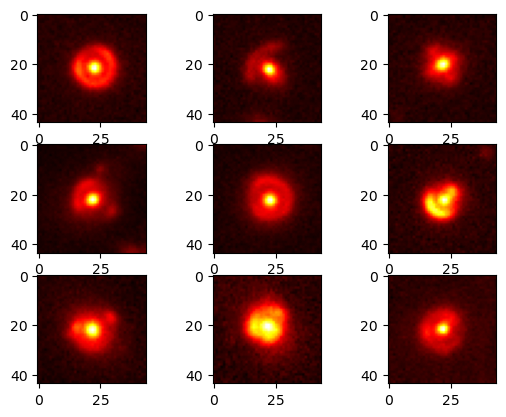

In [4]:
for count, image in zip(range(1,10),list_files[:9]):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    plt.subplot(330+count)
    plt.imshow(get_data, cmap='hot')
plt.show()

## brutal detection of sources using a sigma clip method

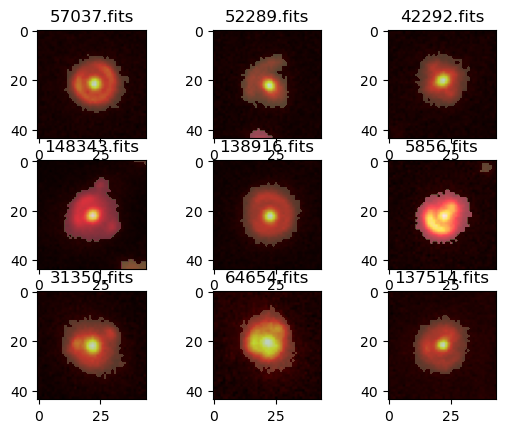

In [5]:
for count, image in zip(range(1,10),list_files[:9]):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    mean, median, std = sigma_clipped_stats(get_data)
    threshold=3.*std
    segm = detect_sources(get_data, threshold, npixels=5)
    plt.figure(1)
    plt.subplot(330+count)
    plt.title(image)
    plt.imshow(get_data, cmap='hot')
    plt.imshow(segm.data, cmap=segm.make_cmap(seed=1234),alpha=0.4)
plt.show()
    

In [6]:
print(segm.data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## brutal detection of sources using a Median Absolute Deviation method

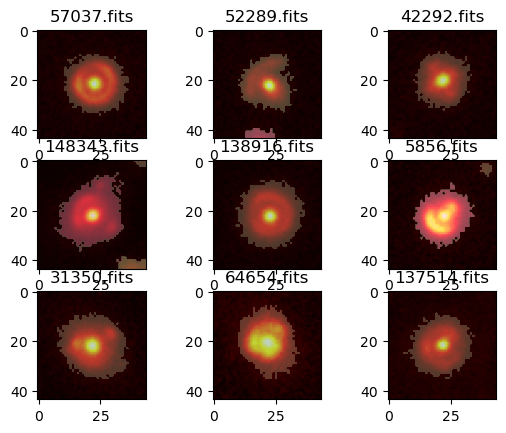

In [7]:
for count, image in zip(range(1,10),list_files[:9]):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    std = median_absolute_deviation(get_data)
    threshold=3.*std
    segm = detect_sources(get_data, threshold, npixels=5)
    plt.figure(1)
    plt.subplot(330+count)
    plt.title(image)
    plt.imshow(get_data, cmap='hot')
    plt.imshow(segm.data, cmap=segm.make_cmap(seed=1234),alpha=0.4)
plt.show()

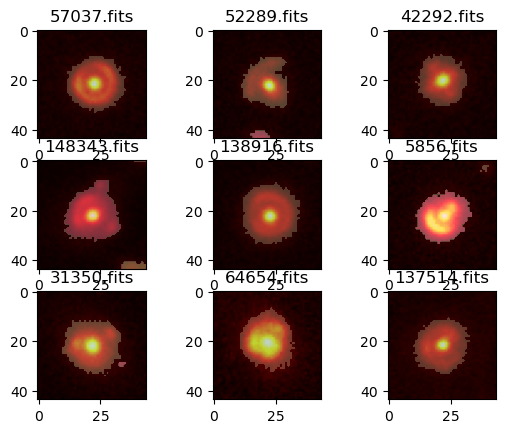

In [8]:
for count, image in zip(range(1,10),list_files[:9]):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    std = mad_std(get_data)
    threshold=3.*std
    segm = detect_sources(get_data, threshold, npixels=5)
    plt.figure(1)
    plt.subplot(330+count)
    plt.title(image)
    plt.imshow(get_data, cmap='hot')
    plt.imshow(segm.data, cmap=segm.make_cmap(seed=1234),alpha=0.4)
plt.show()